In [56]:
##conda update --all

In [323]:
'''Importing Data Manipulation Modules'''
import pandas as pd
from pandas import DataFrame
pd.set_option('display.max_columns', 100)
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [223]:
df = pd.read_csv('train.csv',dtype='unicode')

In [224]:
df.shape

(1460, 81)

In [225]:
df.dtypes.value_counts()

object    81
dtype: int64

In [226]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   object
 1   MSSubClass     1460 non-null   object
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1201 non-null   object
 4   LotArea        1460 non-null   object
 5   Street         1460 non-null   object
 6   Alley          91 non-null     object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   object
 18  OverallCond    1460 non-null

In [228]:
# Convert Object features to numerical features.
cleaned_df = df.copy()
Convert_features_int = ['MSSubClass','LotArea','OverallQual','OverallCond','BsmtFinSF1',
                   'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                   'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                   'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                   'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']
Convert_features_float = ['LotFrontage','MasVnrArea']
cleaned_df[Convert_features_int] = cleaned_df[Convert_features_int].astype(np.int)
cleaned_df[Convert_features_float] = cleaned_df[Convert_features_float].astype(np.float)
cleaned_df.info()                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   object 
 1   MSSubClass     1460 non-null   int32  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int32  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int32  
 18  OverallC

In [229]:
## Check for null values
#df.isnull().values.any()
cleaned_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

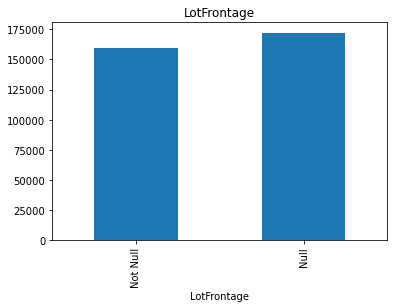

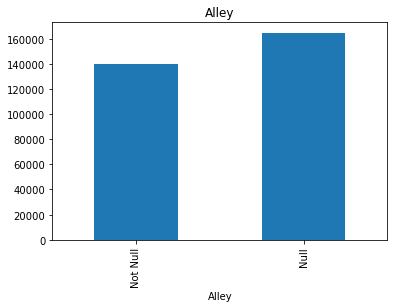

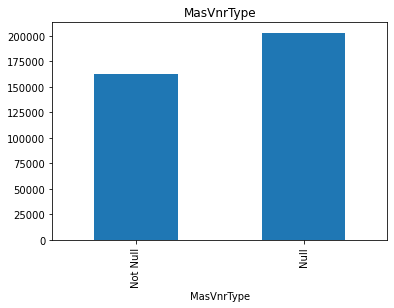

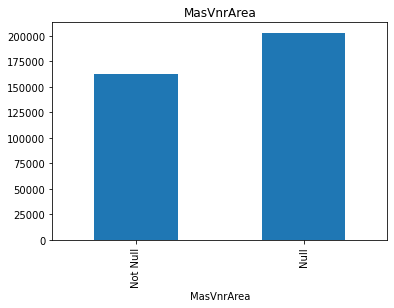

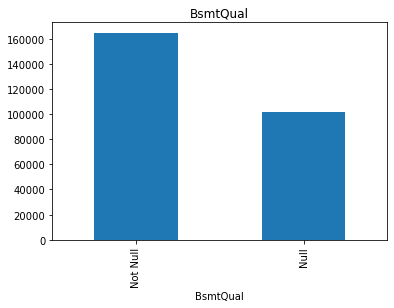

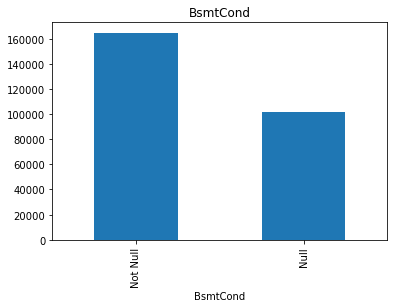

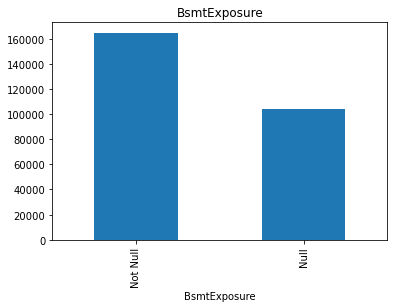

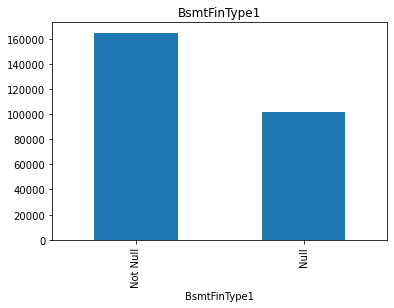

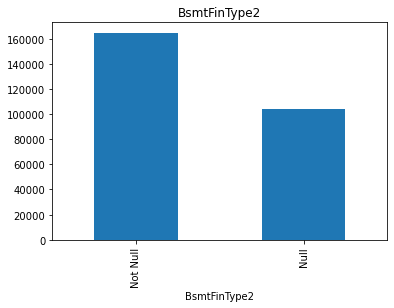

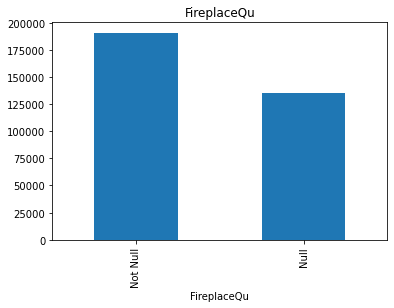

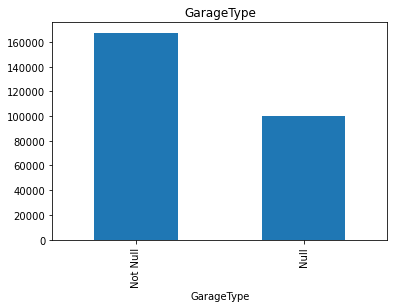

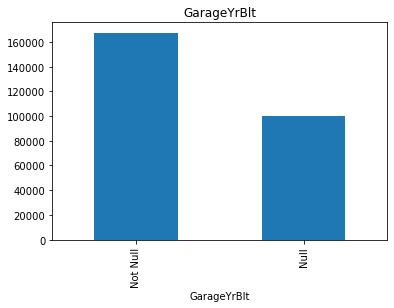

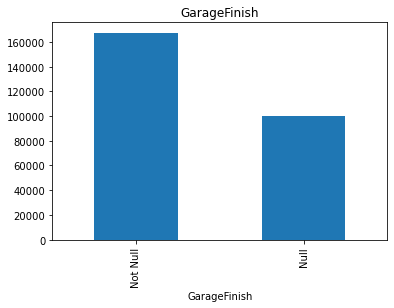

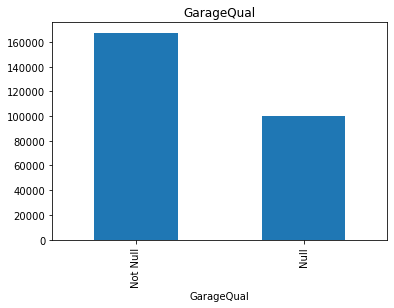

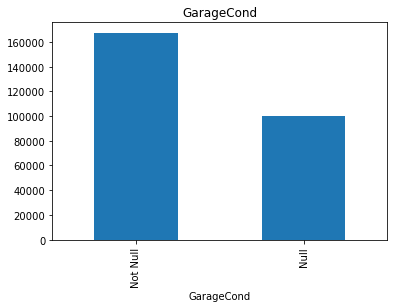

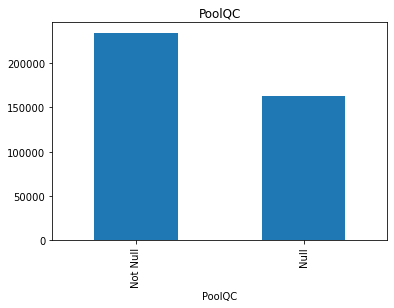

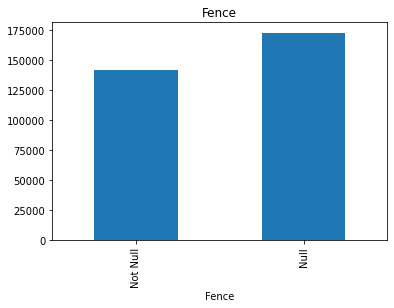

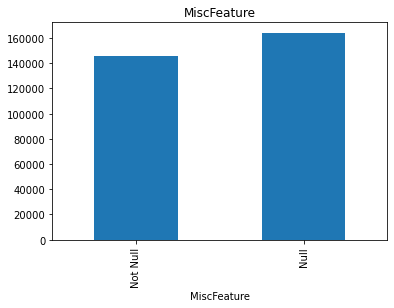

In [231]:
# Checking if NaN Values have any impact on the Sale Price or not
NA_features=[features for features in cleaned_df.columns if cleaned_df[features].isnull().sum()>1]

for feature in NA_features:
    data = cleaned_df.copy() 
    data[feature] = np.where(data[feature].isnull(), 'Null', 'Not Null')
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [232]:
## Inference 
## Null values have impact on the Sales price, so we need to handle the missing values 

In [233]:
cleaned_df[NA_features].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [234]:
# Drop "Id" because it is unique
cleaned_df.drop(['Id'],axis=1,inplace=True)

# Drop features which have most null values 
cleaned_df.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1,inplace=True)
cleaned_df.shape

(1460, 76)

In [235]:
# list of numerical variables and categorical features
Num_features = [feature for feature in cleaned_df.columns if cleaned_df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(Num_features))

Cat_features = [feature for feature in cleaned_df.columns if cleaned_df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(Cat_features))

Number of numerical variables:  32
Number of categorical variables:  44


In [236]:

year_columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
#df[year_columns] = df[year_columns].fillna(df[year_columns].mode()[0])
cleaned_df[year_columns] = cleaned_df[year_columns].astype(np.float)
cleaned_df[year_columns].info()

#cleaned_df['SalePrice'] = cleaned_df['SalePrice'].astype(np.int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1460 non-null   float64
 1   YearRemodAdd  1460 non-null   float64
 2   GarageYrBlt   1379 non-null   float64
 3   YrSold        1460 non-null   float64
dtypes: float64(4)
memory usage: 45.8 KB


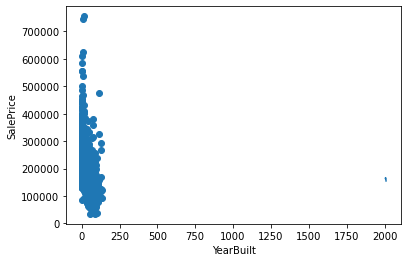

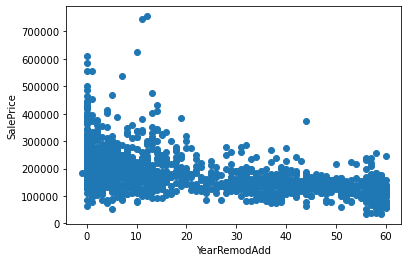

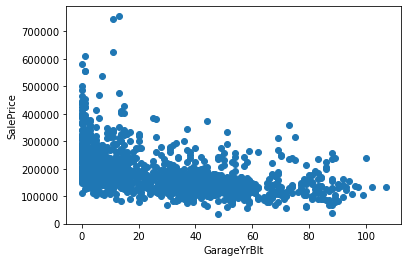

In [237]:
cleaned_df.groupby('YrSold')['SalePrice'].median().plot()
for feature in year_columns:
    if feature!='YrSold':
        ## We will capture the difference between year variable and year the house was sold for
        cleaned_df[feature]=cleaned_df['YrSold']-cleaned_df[feature]

        plt.scatter(cleaned_df[feature],cleaned_df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


In [238]:
## Inference

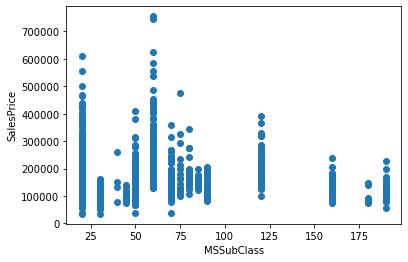

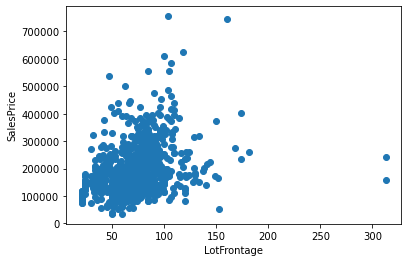

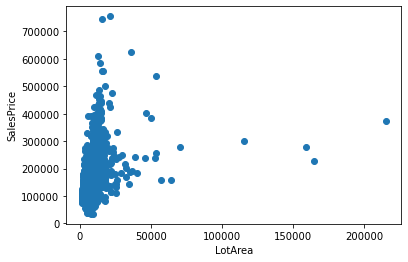

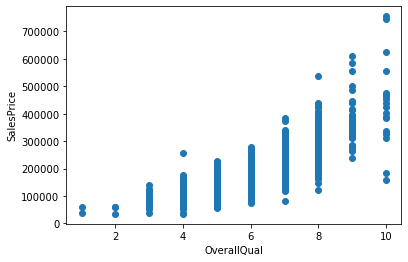

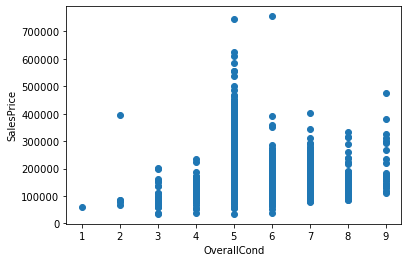

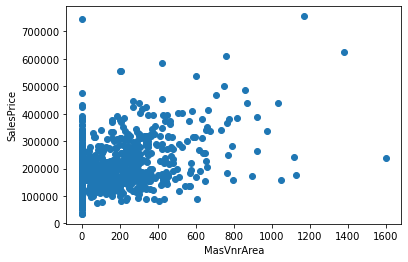

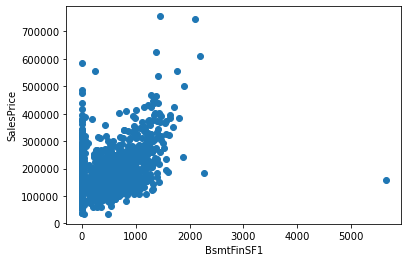

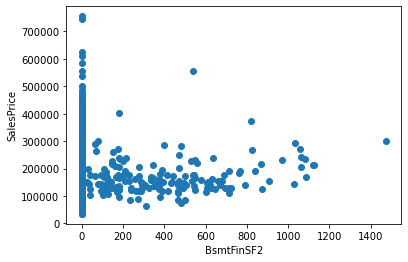

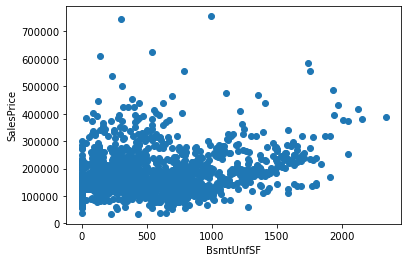

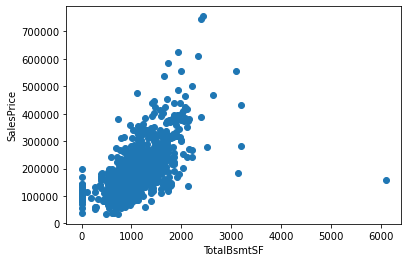

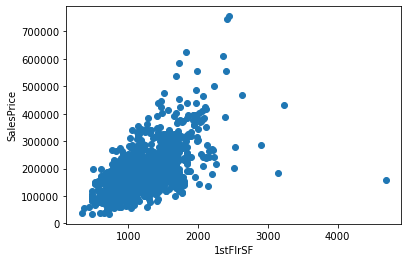

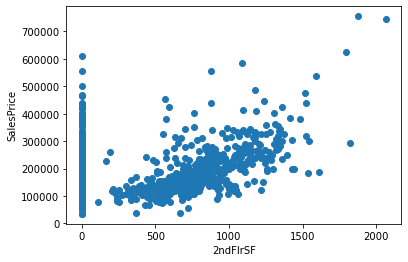

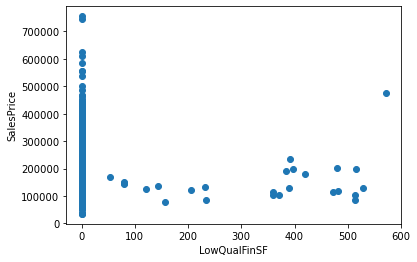

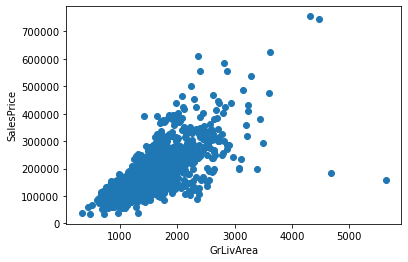

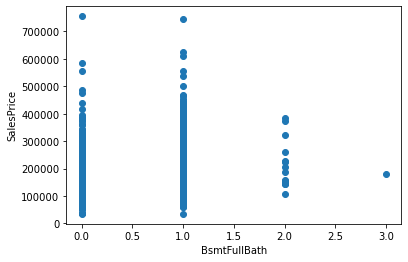

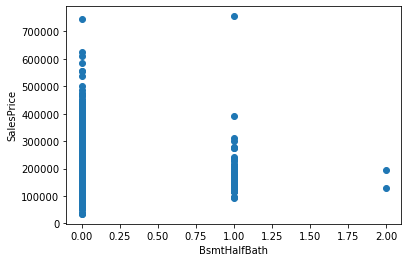

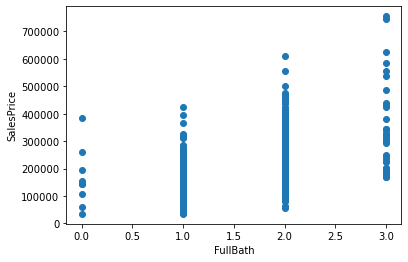

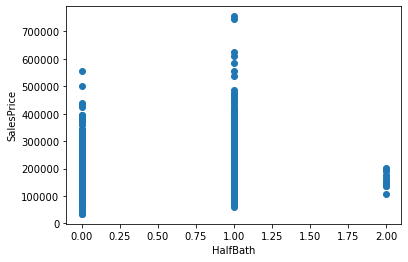

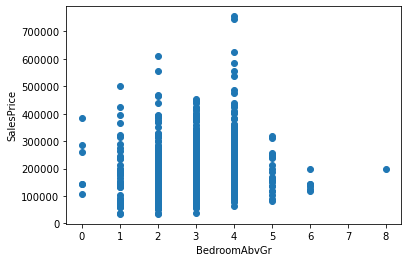

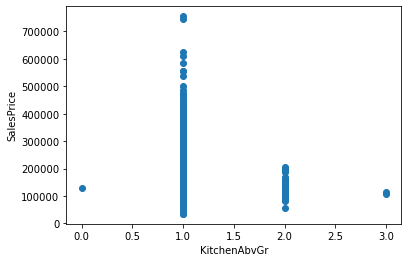

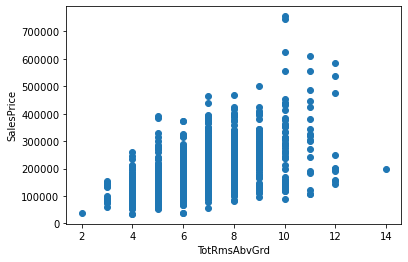

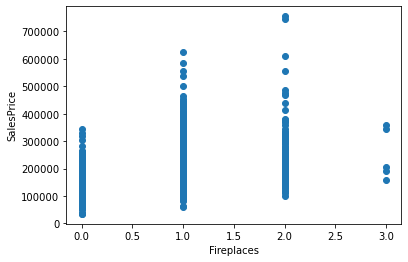

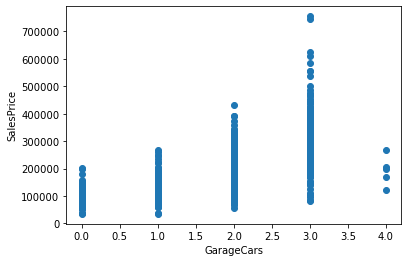

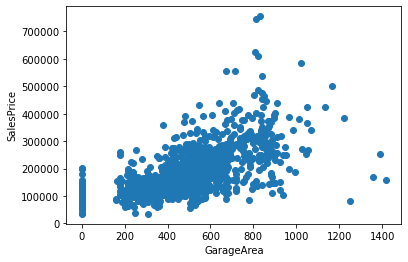

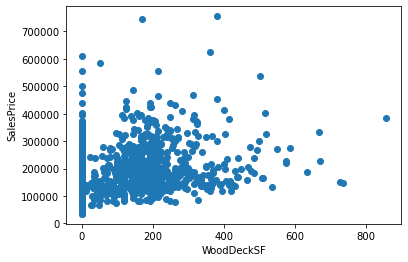

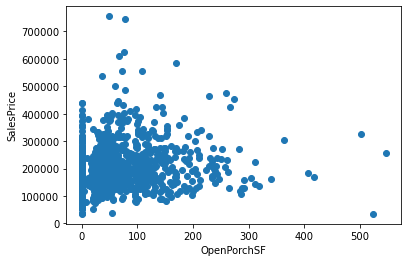

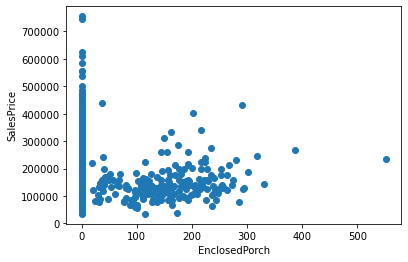

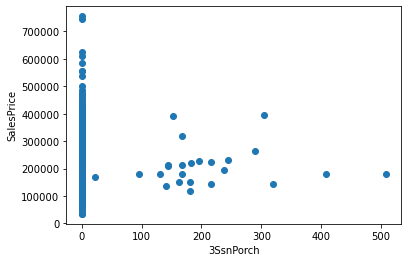

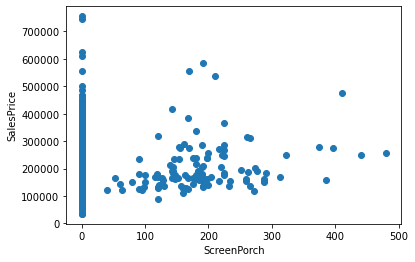

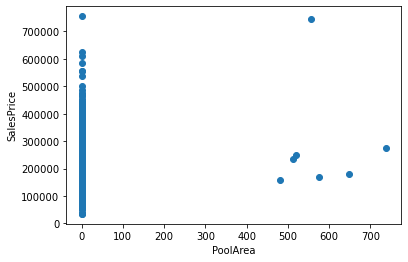

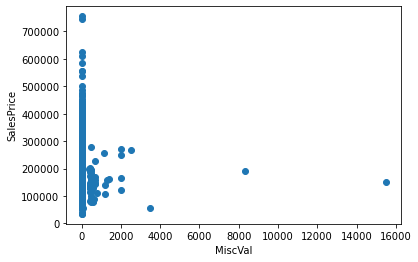

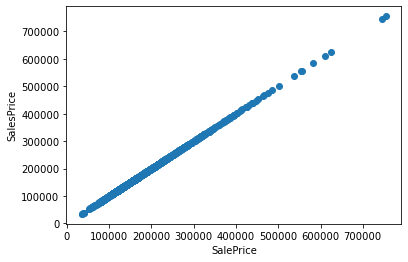

In [239]:
## Visulaize numerical features
for feature in Num_features:
        plt.scatter(cleaned_df[feature],cleaned_df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.show()

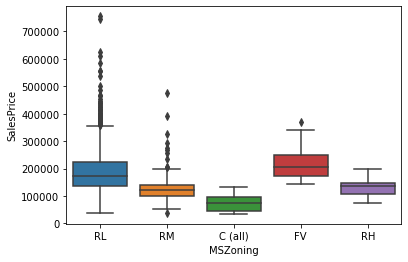

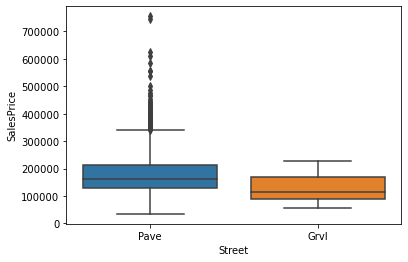

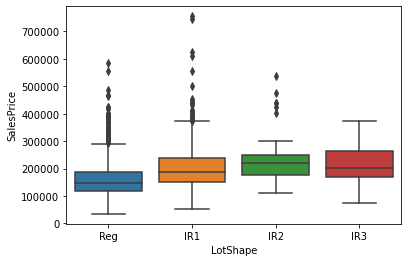

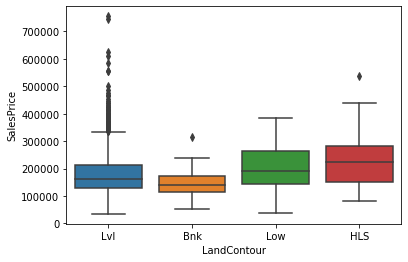

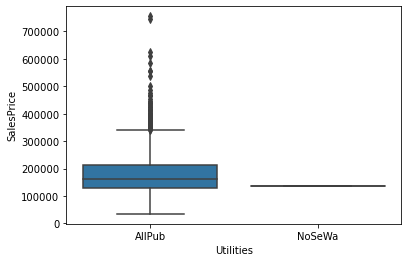

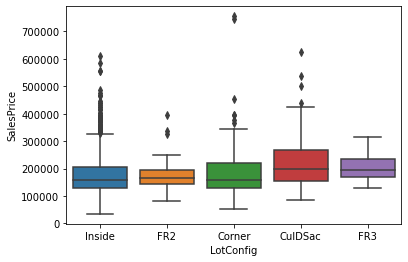

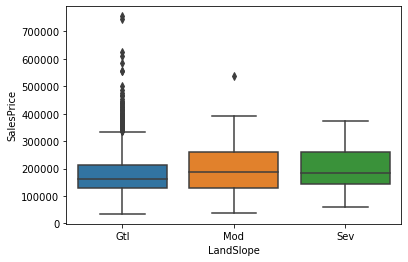

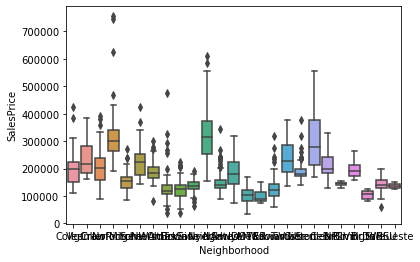

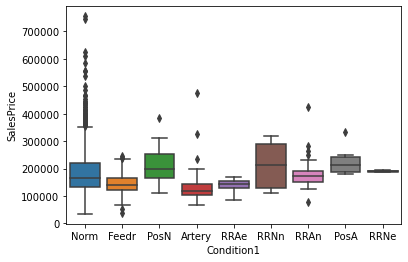

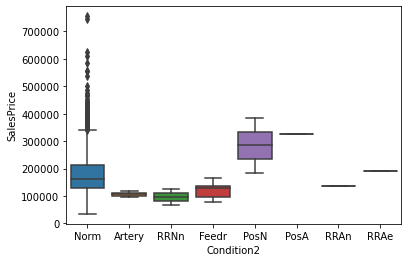

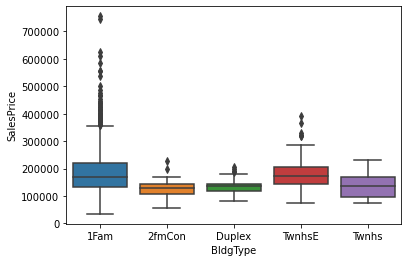

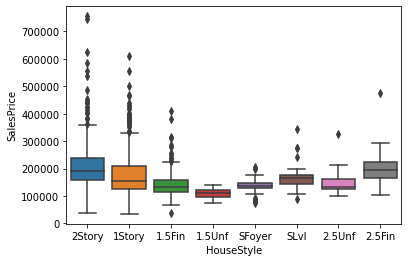

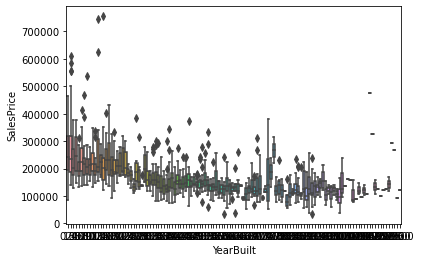

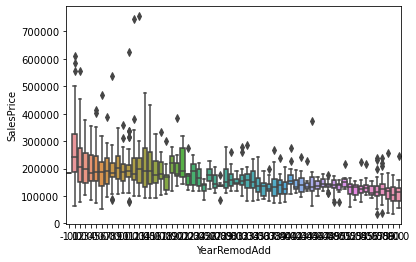

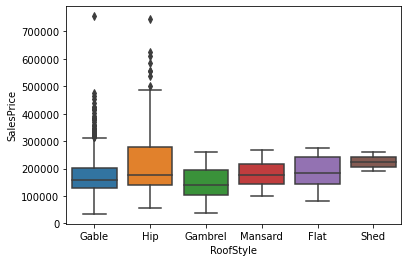

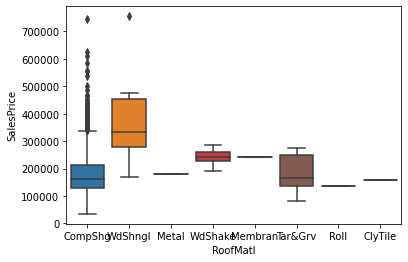

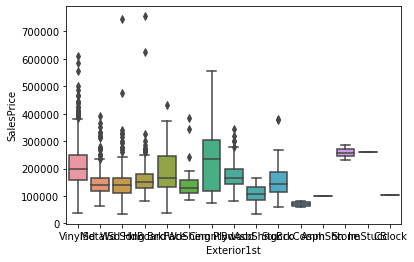

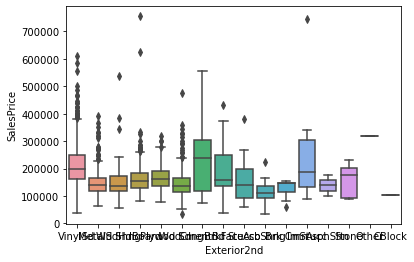

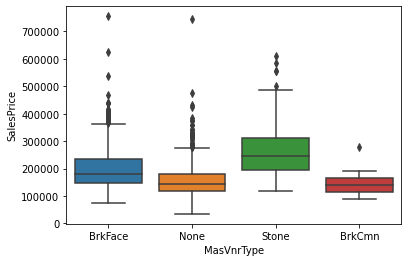

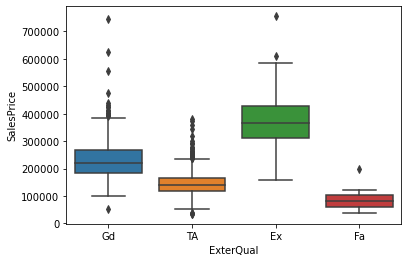

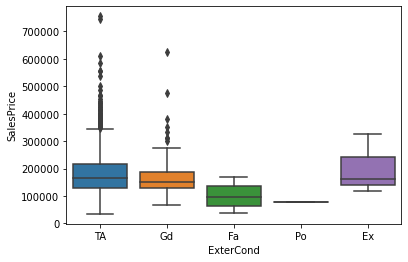

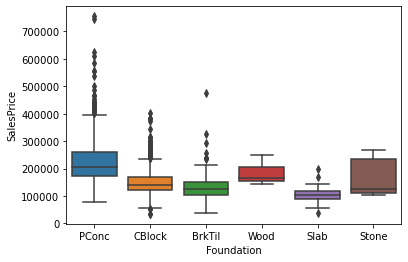

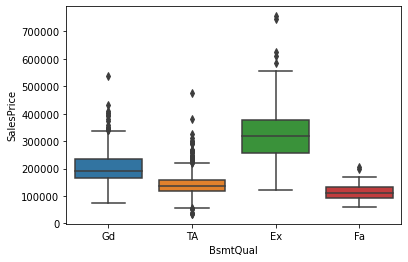

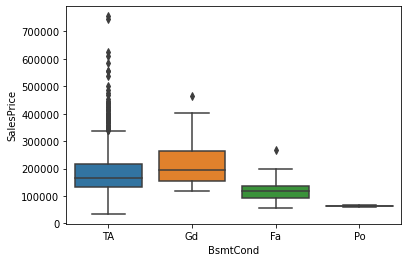

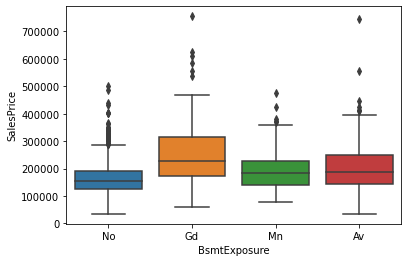

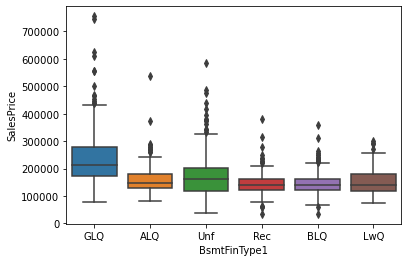

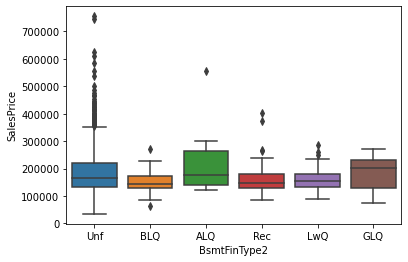

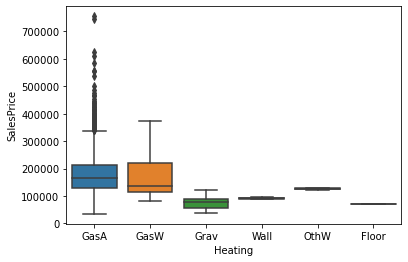

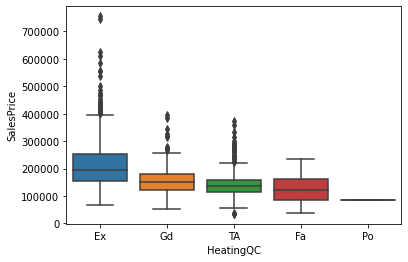

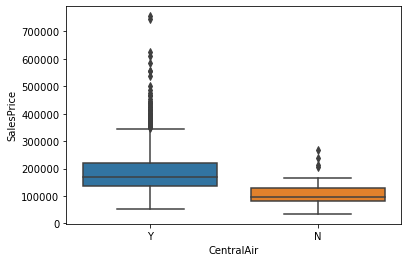

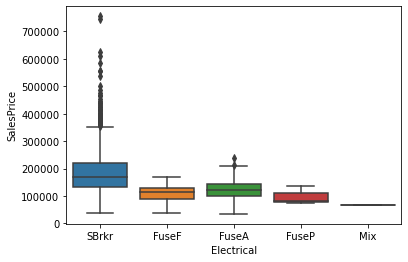

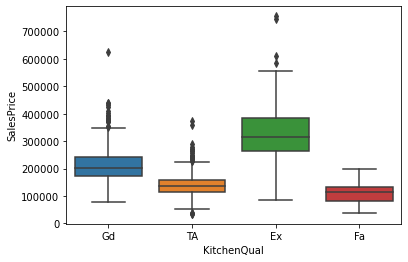

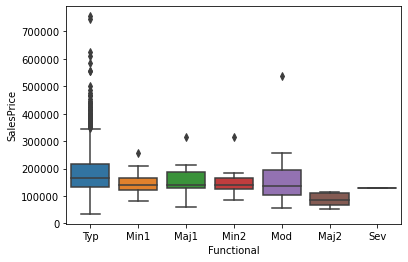

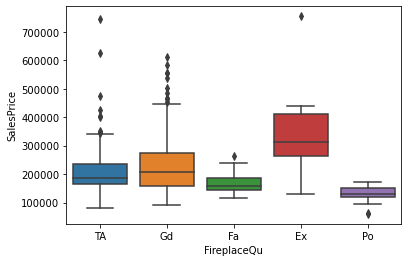

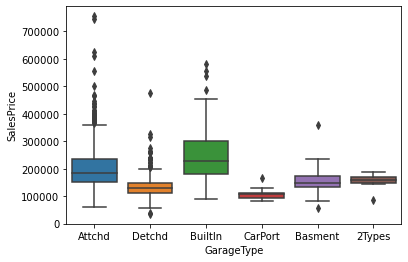

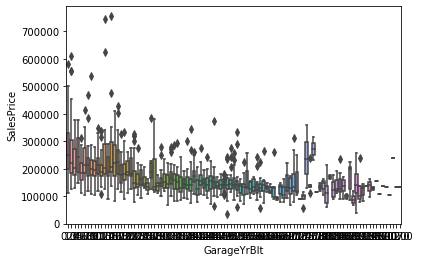

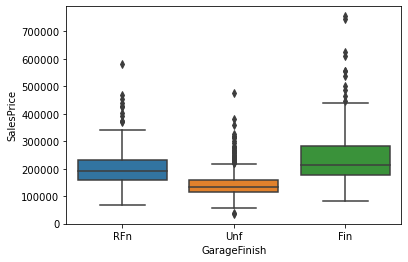

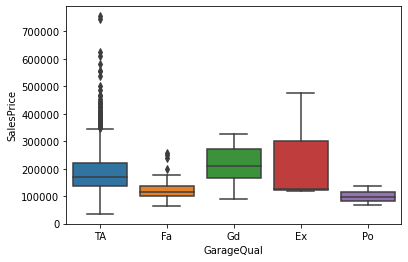

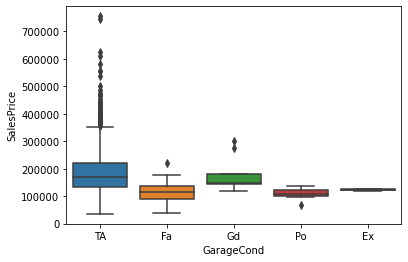

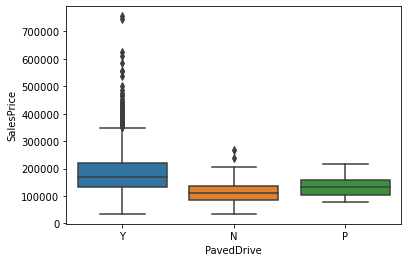

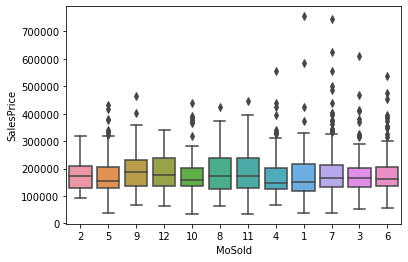

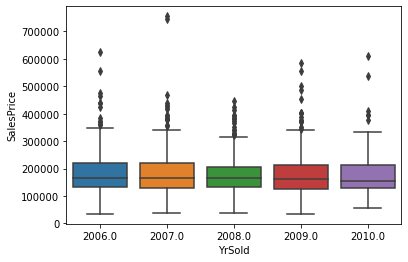

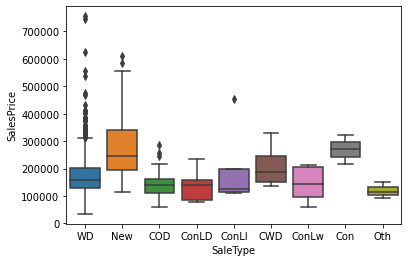

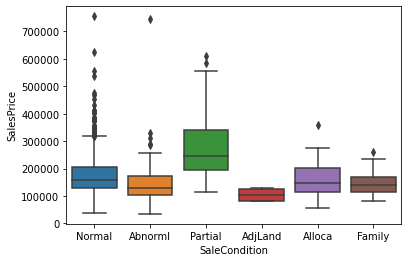

In [240]:
## Visulaize Categorical features
for feature in Cat_features:
        sns.boxplot(cleaned_df[feature],cleaned_df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.show()

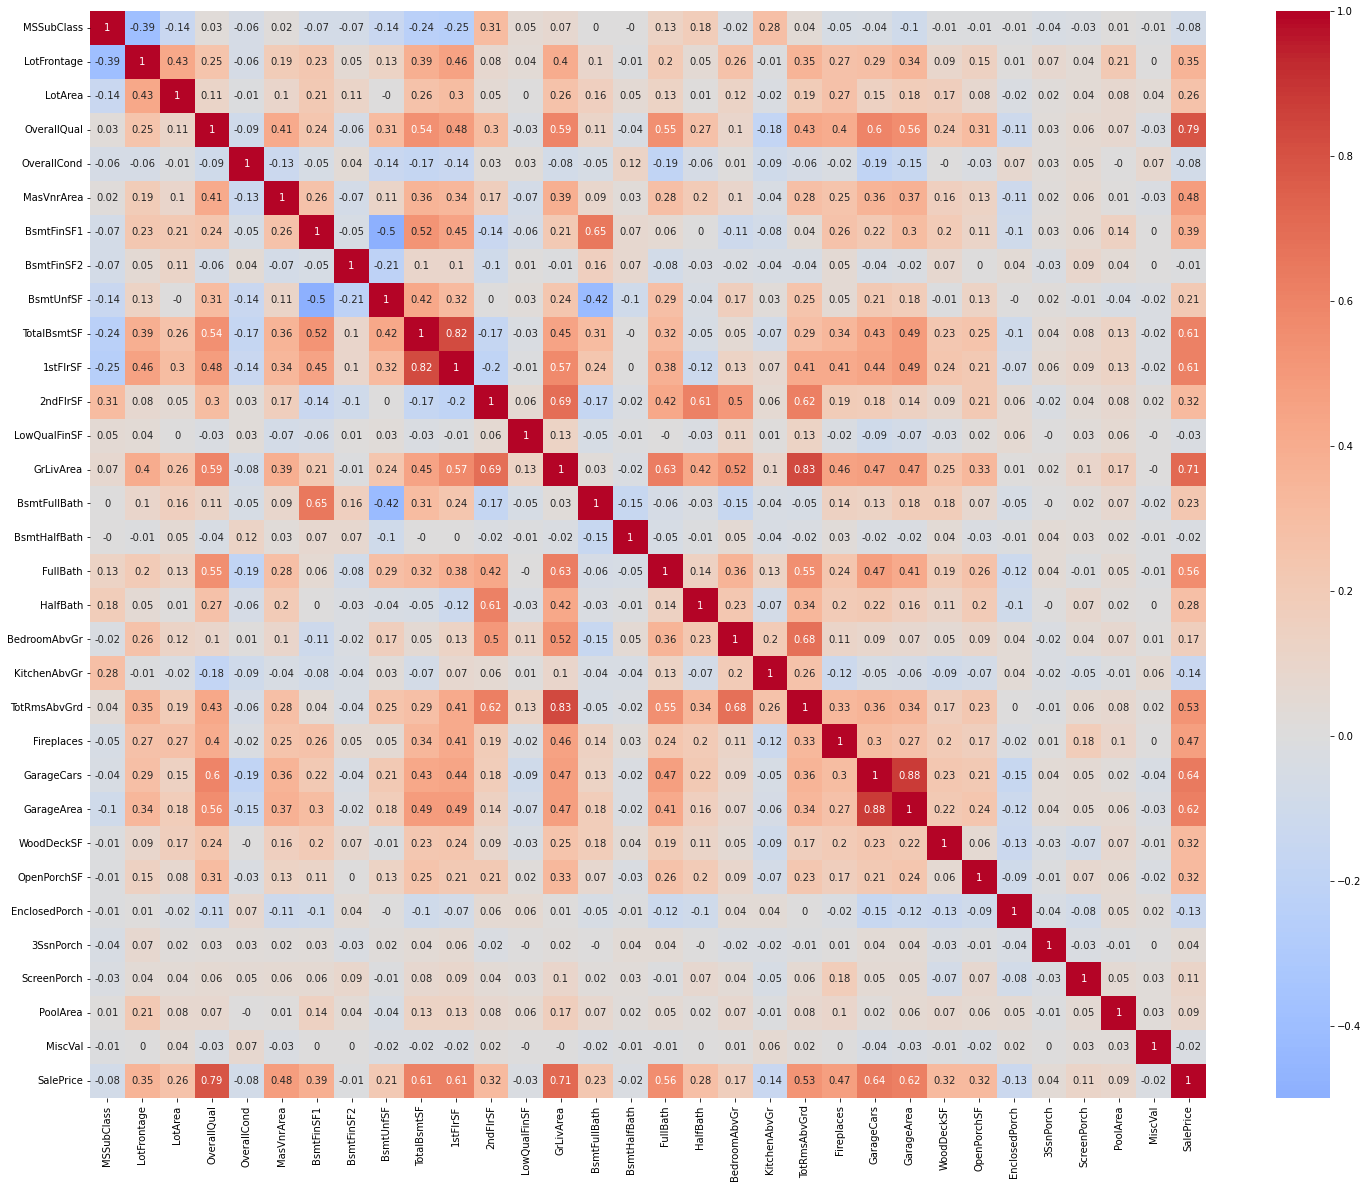

In [241]:
# Checking the corelation
df_num = cleaned_df[Num_features]
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

## Handle missing values  

In [242]:
# Fill missing value with frequently mode
cleaned_df['BsmtCond']=cleaned_df['BsmtCond'].fillna(cleaned_df['BsmtCond'].mode()[0])
cleaned_df['BsmtQual']=cleaned_df['BsmtQual'].fillna(cleaned_df['BsmtQual'].mode()[0])

cleaned_df['FireplaceQu']=cleaned_df['FireplaceQu'].fillna(cleaned_df['FireplaceQu'].mode()[0])

cleaned_df['GarageType'] = cleaned_df['GarageType'].fillna(cleaned_df['GarageType'].mode()[0])
cleaned_df['GarageFinish'] = cleaned_df['GarageFinish'].fillna(cleaned_df['GarageFinish'].mode()[0])
cleaned_df['GarageQual'] = cleaned_df['GarageQual'].fillna(cleaned_df['GarageQual'].mode()[0])
cleaned_df['GarageCond'] = cleaned_df['GarageCond'].fillna(cleaned_df['GarageCond'].mode()[0])

cleaned_df['YearBuilt'] = cleaned_df['YearBuilt'].fillna(cleaned_df['YearBuilt'].mode()[0])
cleaned_df['YearRemodAdd'] = cleaned_df['YearRemodAdd'].fillna(cleaned_df['YearRemodAdd'].mode()[0])
cleaned_df['GarageYrBlt'] = cleaned_df['GarageYrBlt'].fillna(cleaned_df['GarageYrBlt'].mode()[0])
cleaned_df['YrSold'] = cleaned_df['YrSold'].fillna(cleaned_df['YrSold'].mode()[0])

In [243]:
## Drop features having redundant values 
cleaned_df.drop(['LandSlope','Condition1','Condition2','Utilities','Heating'],axis=1,inplace=True)   
cleaned_df.shape

(1460, 71)

In [244]:
#Creating some new features based on the existing features

#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
cleaned_df['Total_sqr_footage'] = (cleaned_df['BsmtFinSF1'] + cleaned_df['BsmtFinSF2'] + cleaned_df['1stFlrSF'] + cleaned_df['2ndFlrSF'])
#Creating derived column for total porch area 
cleaned_df['Total_porch_sf'] = (cleaned_df['OpenPorchSF'] + cleaned_df['3SsnPorch'] + cleaned_df['EnclosedPorch'] + cleaned_df['ScreenPorch'] + cleaned_df['WoodDeckSF'])
cleaned_df.drop(['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF'],axis=1,inplace=True) 
cleaned_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_sqr_footage,Total_porch_sf
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,CollgCr,1Fam,2Story,7,5,5.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,Ex,Y,SBrkr,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,5.0,RFn,2,548,TA,TA,Y,0,0,2,2008.0,WD,Normal,208500,2416,61
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Veenker,1Fam,1Story,6,8,31.0,31.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,Ex,Y,SBrkr,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,0,0,5,2007.0,WD,Normal,181500,2240,298
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,CollgCr,1Fam,2Story,7,5,7.0,6.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,Ex,Y,SBrkr,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,0,9,2008.0,WD,Normal,223500,2272,42
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Crawfor,1Fam,2Story,7,5,91.0,36.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,Gd,Y,SBrkr,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,0,2,2006.0,WD,Abnorml,140000,1933,307
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,NoRidge,1Fam,2Story,8,5,8.0,8.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,Ex,Y,SBrkr,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,0,0,12,2008.0,WD,Normal,250000,2853,276


In [245]:
cleaned_df.shape

(1460, 64)

In [246]:
print(round(cleaned_df.isnull().sum()/len(cleaned_df.index)*100,2).sort_values(ascending=False)[ round(cleaned_df.isnull().sum()/len(df.index),2) > 0 ] )

LotFrontage     17.74
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [249]:
cleaned_df['LotFrontage'] = cleaned_df['LotFrontage'].fillna(cleaned_df['LotFrontage'].median())
cleaned_df['Electrical'] = cleaned_df['Electrical'].fillna(cleaned_df['Electrical'].mode()[0])
cleaned_df['BsmtExposure'] = cleaned_df['BsmtExposure'].fillna('None')
cleaned_df['BsmtFinType2'] = cleaned_df['BsmtFinType2'].fillna('None')
cleaned_df['BsmtFinType1'] = cleaned_df['BsmtFinType1'].fillna('None')
cleaned_df['MasVnrType'] = cleaned_df['MasVnrType'].fillna('None')
cleaned_df['MasVnrArea'] = cleaned_df['MasVnrArea'].fillna(0)

In [253]:
cleaned_df.isnull().sum()

MSSubClass           0
MSZoning             0
LotFrontage          0
LotArea              0
Street               0
                    ..
SaleType             0
SaleCondition        0
SalePrice            0
Total_sqr_footage    0
Total_porch_sf       0
Length: 64, dtype: int64

In [254]:
num_col=[]
cat_col=[]
for i in cleaned_df.columns:
    if cleaned_df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
#cleaned_df[cat_col]  
df_dummy= pd.get_dummies(cleaned_df[cat_col])   
cleaned_df=pd.concat([cleaned_df,df_dummy],axis=1)
cleaned_df= cleaned_df.drop(cat_col,axis=1)  
cleaned_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolArea,MiscVal,YrSold,SalePrice,Total_sqr_footage,Total_porch_sf,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,...,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,5.0,5.0,196.0,150,856,0,1710,1,0,2,1,3,1,8,0,5.0,2,548,0,0,2008.0,208500,2416,61,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,31.0,31.0,0.0,284,1262,0,1262,0,1,2,0,3,1,6,1,31.0,2,460,0,0,2007.0,181500,2240,298,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,7.0,6.0,162.0,434,920,0,1786,1,0,2,1,3,1,6,1,7.0,2,608,0,0,2008.0,223500,2272,42,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,91.0,36.0,0.0,540,756,0,1717,1,0,1,0,3,1,7,1,8.0,3,642,0,0,2006.0,140000,1933,307,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,8.0,8.0,350.0,490,1145,0,2198,1,0,2,1,4,1,9,1,8.0,3,836,0,0,2008.0,250000,2853,276,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [255]:
X = cleaned_df.drop('SalePrice',axis=1)
y = cleaned_df['SalePrice']

In [256]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from math import sqrt

In [257]:
#Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

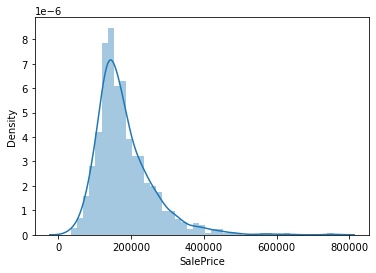

In [258]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

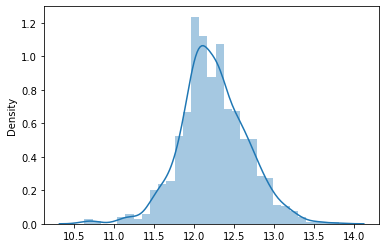

In [259]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())
sns.distplot(y_train)
plt.show()

In [260]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolArea,MiscVal,YrSold,Total_sqr_footage,Total_porch_sf,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,...,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
64,60,69.0,9375,7,5,12.0,11.0,573.0,318,1057,0,2034,1,0,2,1,3,1,8,0,11.0,2,645,0,0,2009.0,2773,612,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
682,120,69.0,2887,6,5,12.0,11.0,0.0,288,1291,0,1291,1,0,1,0,2,1,6,1,12.0,2,431,0,0,2008.0,2294,307,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
960,20,50.0,7207,5,7,52.0,2.0,0.0,162,858,0,858,1,0,1,0,2,1,4,0,1.0,0,0,0,0,2010.0,1554,117,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1384,50,60.0,9060,6,5,70.0,59.0,0.0,356,560,0,1258,0,0,1,0,2,1,6,0,70.0,1,280,0,0,2009.0,1462,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1100,30,60.0,8400,2,5,89.0,59.0,0.0,0,290,0,438,0,0,1,0,1,1,3,0,79.0,1,246,0,0,2009.0,728,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [261]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [262]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolArea,MiscVal,YrSold,Total_sqr_footage,Total_porch_sf,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,...,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.164384,0.037743,0.666667,0.50,0.088235,0.196721,0.358125,0.158841,0.329694,0.0,0.391525,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.102804,0.50,0.475664,0.0,0.0,0.75,0.369434,0.595910,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.588235,0.164384,0.007418,0.555556,0.50,0.088235,0.196721,0.000000,0.143856,0.402682,0.0,0.220405,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.333333,0.112150,0.50,0.317847,0.0,0.0,0.50,0.296880,0.298929,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.099315,0.027610,0.444444,0.75,0.382353,0.049180,0.000000,0.080919,0.267623,0.0,0.120682,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.166667,0.000000,0.009346,0.00,0.000000,0.0,0.0,1.00,0.184792,0.113924,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.176471,0.133562,0.036271,0.555556,0.50,0.514706,0.983607,0.000000,0.177822,0.174672,0.0,0.212805,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.000000,0.654206,0.25,0.206490,0.0,0.0,0.75,0.170857,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.058824,0.133562,0.033186,0.111111,0.50,0.654412,0.983607,0.000000,0.000000,0.090455,0.0,0.023952,0.000000,0.0,0.333333,0.0,0.125,0.333333,0.083333,0.000000,0.738318,0.25,0.181416,0.0,0.0,0.75,0.059679,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [294]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score on test', r2_test_lr)
metric.append(r2_test_lr)
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score on train', r2_train_lr)
metric.append(r2_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE on test', mse_test_lr)     
metric.append(mse_test_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE on train', mse_train_lr)     
metric.append(mse_train_lr)


R2 score on test -1.0341355607540705e+20
R2 score on train 0.9368448864902301
MSE on test 1.7182983774660379e+19
MSE on train 0.01096642490280237


Ridge regression

In [287]:
# list of alphas to tune - High value will lead underfitting, low values will not handle overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True, 
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
print(model_cv.best_params_)

print('The optimum alpha is',model_cv.best_params_)
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
print(ridge.coef_)
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)
print('R2 score',r2_score(y_test, y_test_pred))
print('MSE', mean_squared_error(y_test, y_test_pred))

Fitting 11 folds for each of 28 candidates, totalling 308 fits
{'alpha': 2.0}
The optimum alpha is {'alpha': 2.0}
[[-2.81278757e-02  8.68099658e-02  1.47203599e-01  3.68193203e-01
   2.26473417e-01 -6.93988404e-02 -6.26723354e-02  6.20484884e-03
   6.50645023e-02  2.14215012e-01  1.97477677e-02  3.45425628e-01
   9.29945327e-02  1.98601132e-02  1.36399907e-01  8.26987167e-02
   1.17029787e-01 -8.24005341e-02  1.79190905e-01  9.46343254e-02
   4.47578535e-02  1.17537364e-01  1.58997840e-01  7.51601982e-02
  -1.81621842e-02 -4.22952407e-03  3.09763185e-01  1.21212838e-01
  -2.78634830e-01  1.07103961e-01  5.68085942e-02  7.20002424e-02
   4.27220317e-02 -3.62037001e-02  3.62037001e-02 -2.84742326e-02
   1.68988445e-02  3.39992320e-02 -2.24238439e-02 -2.16736921e-02
   1.66168291e-02 -1.15425013e-02  1.65993643e-02  1.43671623e-02
   4.99951057e-02 -3.78809750e-02 -2.47840102e-02 -1.69728274e-03
   1.59880056e-02 -4.33462178e-02 -6.29255337e-02  1.25899970e-02
   6.32574548e-02  8.8422549

In [305]:
metric1 = []
r2_test_lr = r2_score(y_test, y_test_pred)
print('R2 score on test', r2_test_lr)
metric1.append(r2_test_lr)
r2_train_lr = r2_score(y_train, y_train_pred)
print('R2 score on train', r2_train_lr)
metric1.append(r2_train_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
print('MSE on test', mse_test_lr)     
metric1.append(mse_test_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('MSE on train', mse_train_lr)     
metric1.append(mse_train_lr)

R2 score on test 0.847718028288654
R2 score on train 0.9147595003550995
MSE on test 0.025302859203307312
MSE on train 0.014801391147662915


In [295]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
print(vif.sort_values(by='VIF',ascending=False))
high_vif = vif[vif['VIF']>5]
high_vif

               Features   VIF
127  Exterior2nd_Stucco   inf
174   BsmtFinType2_None   inf
161     BsmtExposure_No   inf
162   BsmtExposure_None   inf
163    BsmtFinType1_ALQ   inf
..                  ...   ...
25               YrSold  1.45
24              MiscVal  1.32
92     RoofMatl_ClyTile   NaN
94     RoofMatl_Membran   NaN
198      Functional_Sev   NaN

[254 rows x 2 columns]


,Features,VIF
0,MSSubClass,32.50
3,OverallQual,5.45
5,YearBuilt,16.31
8,BsmtUnfSF,inf
9,TotalBsmtSF,inf
...,...,...
249,SaleCondition_AdjLand,inf
250,SaleCondition_Alloca,inf
251,SaleCondition_Family,inf
252,SaleCondition_Normal,inf


In [296]:
# Dropping cols with high VIF
X_train_1 = X_train.drop(high_vif.Features,axis=1)
X_test_1 = X_test.drop(high_vif.Features,axis=1)

In [306]:
# list of alphas to tune - High value will lead underfitting, low values will not handle overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge_1 = Ridge()

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True, 
                        verbose = 1)            
model_cv.fit(X_train_1, y_train) 
print(model_cv.best_params_)

print('The optimum alpha is',model_cv.best_params_)
alpha = 0.4
ridge_1 = Ridge(alpha=alpha)
ridge_1.fit(X_train_1,y_train)
print(ridge_1.coef_)
y_test_pred = ridge_1.predict(X_test_1)
y_train_pred = ridge_1.predict(X_train_1)
print('R2 score',r2_score(y_test, y_test_pred))
print('MSE', mean_squared_error(y_test, y_test_pred))

Fitting 11 folds for each of 28 candidates, totalling 308 fits
{'alpha': 0.4}
The optimum alpha is {'alpha': 0.4}
[[ 0.83446162  0.45264818  0.23735478 -0.31568523  0.56458807  0.33736759
   0.02227717  0.73742399  0.19332239  0.12025076 -0.40024917  0.42221589
  -0.10106416  0.10410163 -0.028776   -0.03236182  0.28367264  0.
   0.          0.        ]]
R2 score 0.6702767323541927
MSE 0.05478613997138487


In [307]:
## Inference 
#The model explains about 67% of the variation in our dependent variable. Hence drop this model.

Lasso regression

In [308]:
# Builsing a Lasso Model with GridSearch CV to find the optimum alpha
# list of alphas to tune - High value will lead underfitting, low values will not handle overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True, 
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
print(model_cv.best_params_)

print('The optimum alpha is',model_cv.best_params_)
alpha =  0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
print(lasso.coef_)
y_test_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train)
print('R2 score',r2_score(y_test, y_test_pred))
print('MSE', mean_squared_error(y_test, y_test_pred))

Fitting 11 folds for each of 28 candidates, totalling 308 fits
{'alpha': 0.001}
The optimum alpha is {'alpha': 0.001}
[-0.00000000e+00  0.00000000e+00  0.00000000e+00  5.44779710e-01
  2.25770514e-01 -3.04474648e-02 -5.88731696e-02  0.00000000e+00
  0.00000000e+00  2.88738272e-01  0.00000000e+00  6.70995461e-01
  5.41039901e-02  0.00000000e+00  7.45120418e-02  3.60207458e-02
  0.00000000e+00 -0.00000000e+00  1.04946021e-01  1.12025093e-01
  0.00000000e+00  1.66573045e-01  1.15450236e-01  0.00000000e+00
 -0.00000000e+00 -4.32862995e-05  2.38960761e-01  9.75452796e-02
 -2.68295756e-01  2.62928730e-02  0.00000000e+00  1.60200502e-02
 -5.91003215e-02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  2.15361431e-02  0.00000000e+00 -6.89620770e-03 -5.03831928e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.25414029e-03
  3.81912317e-02 -0.00000000e+00 -0.00000000e+00 -4.29445315e-03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.36158927e-03
  4.13589488e-02  0.00000000e+00  1.1

In [309]:
metric2 = []
r2_test_lr = r2_score(y_test, y_test_pred)
print('R2 score on test', r2_test_lr)
metric2.append(r2_test_lr)
r2_train_lr = r2_score(y_train, y_train_pred)
print('R2 score on train', r2_train_lr)
metric2.append(r2_train_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
print('MSE on test', mse_test_lr)     
metric2.append(mse_test_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('MSE on train', mse_train_lr)     
metric2.append(mse_train_lr)


R2 score on test 0.847718028288654
R2 score on train 0.9147595003550995
MSE on test 0.025302859203307312
MSE on train 0.014801391147662915


In [ ]:
##Inference
#We are able to achieve an R2 score of 0.84 approx on both Ridge and Lasso Models.

Subjective Questions - Demonstration/Validation

1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?
Ans 1.a The Optimal value of alpha for ridge is 2 and for lasso it is 0.001.

Ans 1.b: Dunble Ridge and Lasso values 

In [324]:
## Double Ridge values

alpha = 4.0
ridge_double = Ridge(alpha=alpha)
ridge_double.fit(X_train,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test)
y_train_pred = ridge_double.predict(X_train)
print('R2 score',r2_score(y_test, y_test_pred))
print('MSE', mean_squared_error(y_test, y_test_pred))
betas = pd.Dataframe(index=X.columns)
betas.rows = X.columns
betas[ridge_double] = ridge.coef_
pd.set_option('display.max_rows',None)
betass.head()

R2 score 0.8457283116325331
MSE 0.025633466430403963


AttributeError: module 'pandas' has no attribute 'Dataframe'

In [325]:
# Double Lasso value 

alpha =  0.002
lasso_double = Lasso(alpha=alpha)
lasso_double.fit(X_train,y_train)
#print(lasso.coef_)
y_test_pred = lasso_double.predict(X_test)
y_train_pred = lasso_double.predict(X_train)
print('R2 score',r2_score(y_test, y_test_pred))
print('MSE', mean_squared_error(y_test, y_test_pred))
betas = pd.Dataframe(index=X.columns)
betas.rows = X.columns
betas[lasso_double] = lasso_double.coef_
pd.set_option('display.max_rows',None)
betass.head()

R2 score 0.8427405574485536
MSE 0.026129905520348416


AttributeError: module 'pandas' has no attribute 'Dataframe'